In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline
import numpy as np

# Fibonaccijeva števila

## Analiza paralelnega izračuna Fibonaccijevih števil v odvisnosti od števila domen

In [11]:
df_fib_domains = pd.read_csv('fib_par_domains.csv')

/var/folders/9s/v0gzy6497956yzhn8x7gf8mh0000gn/T/ipykernel_33964/724993236.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(xnew, power_smooth, 'b-', linewidth=2, color='grey')


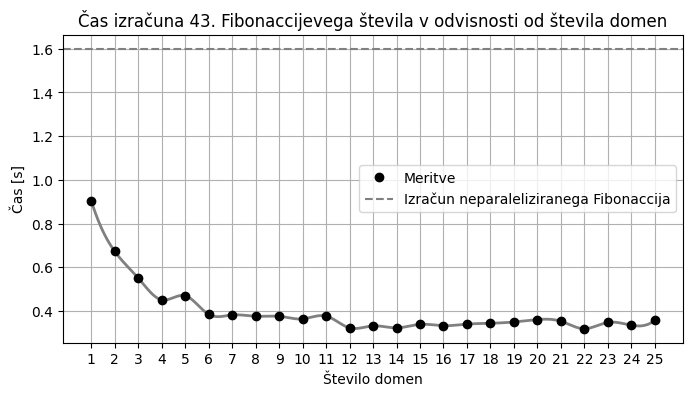

In [12]:
izracun_neparaleliziranega_fibonaccija = 1.6

# Create a new figure
plt.figure(figsize=(8, 4))

# Making the line plot smoother using scipy
xnew = np.linspace(df_fib_domains['num_domains'].min(), df_fib_domains['num_domains'].max(), 500) 
spl = make_interp_spline(df_fib_domains['num_domains'], df_fib_domains['time'], k=3)
power_smooth = spl(xnew)

# Plot the smooth line
plt.plot(xnew, power_smooth, 'b-', linewidth=2, color='grey')

# Plot the data points
plt.plot(df_fib_domains['num_domains'], df_fib_domains['time'], 'ko', label='Meritve')

# Add a straight horizontal line at y=2.9
plt.axhline(y=izracun_neparaleliziranega_fibonaccija, color='grey', linestyle='--', label='Izračun neparaleliziranega Fibonaccija')

# Add title and labels
plt.title('Čas izračuna 43. Fibonaccijevega števila v odvisnosti od števila domen')
plt.xlabel('Število domen')
plt.ylabel('Čas [s]')

# Adjust x-axis to show discrete values
plt.xticks(range(1, 26))

# Adding a grid
plt.grid(True)

# Adding a legend
plt.legend()

# Display the plot
plt.show()

## Analiza časa izračuna n-tega Fibonaccijevega števila pri fiksnem številu domen

In [13]:
df_fib_n = pd.read_csv('fib_par_n.csv')

In [14]:
df_fib_n.head()

,fib_number,parallel_time,non_parallel_time,multiplyer_between_times
0,38,0.152,0.151,0.991
1,39,0.156,0.244,1.560
2,40,0.158,0.425,2.686
3,41,0.196,0.653,3.336
4,42,0.213,1.033,4.839


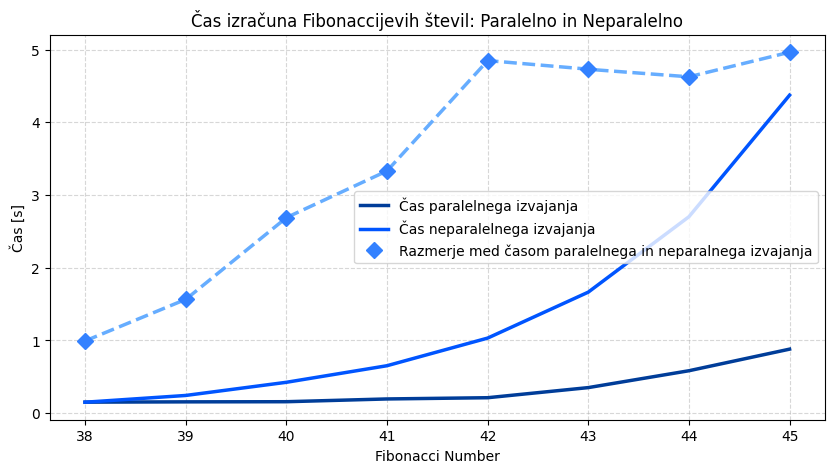

In [42]:
fig, ax = plt.subplots(figsize=(10, 5))

colors = ['#66ADFF', '#3381FF', '#0055FF', '#003D99']

# Plot computation times
ax.plot(df_fib_n['fib_number'], df_fib_n['parallel_time'], label='Čas paralelnega izvajanja', color=colors[3], linewidth=2.5)
ax.plot(df_fib_n['fib_number'], df_fib_n['non_parallel_time'], label='Čas neparalelnega izvajanja', color=colors[2], linewidth=2.5)
ax.set_xlabel('Fibonacci Number')
ax.set_ylabel('Čas [s]')
ax.set_title('Čas izračuna Fibonaccijevih števil: Paralelno in Neparalelno')

# Interpolate speedup between points
fib_numbers = df_fib_n['fib_number']
interp_fib_numbers = np.linspace(fib_numbers.min(), fib_numbers.max(), num=1000, endpoint=True)
interp_speedup = np.interp(interp_fib_numbers, fib_numbers, speedup)

# Plot interpolated speedup as a line
ax.plot(interp_fib_numbers, interp_speedup, color=colors[0], linestyle='--', linewidth=2.5)

# Plot speedup as discrete points
speedup = df_fib_n['non_parallel_time'] / df_fib_n['parallel_time']
ax.plot(df_fib_n['fib_number'], speedup, 'D', label='Razmerje med časom paralelnega in neparalnega izvajanja', color=colors[1], markersize=8)

ax.legend()
ax.grid(True, linestyle='--', alpha=0.5)

plt.show()
